In [67]:
import pandas as pd
import astropy as ap
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from astropy.io import fits
from utils import pooling

In [2]:
%matplotlib inline

http://docs.astropy.org/en/stable/generated/examples/io/plot_fits-image.html#sphx-glr-generated-examples-io-plot-fits-image-py

In [45]:
data = fits.getdata('tess/16/tess2019253231442-s0016-0000000198407592-0152-s_lc.fits')

In [46]:
data = data.astype([(x, '<f8') for x in data.dtype.names])

In [94]:
sap_flux_o_err = data['SAP_FLUX']/data['SAP_FLUX_ERR'].astype('<f8')#.reshape(1,-1)
sap_flux_o_err = sap_flux_o_err/np.nanmax(sap_flux_o_err)

In [95]:
pdcsap_flux_o_err = data['PDCSAP_FLUX']/data['PDCSAP_FLUX_ERR']#.reshape(1,-1)
pdcsap_flux_o_err = pdcsap_flux_o_err/np.nanmax(pdcsap_flux_o_err)

In [76]:
time = data['TIME'].astype('<f8')

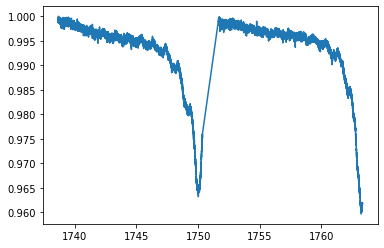

In [96]:
sns.lineplot(x=time, y=sap_flux_o_err)

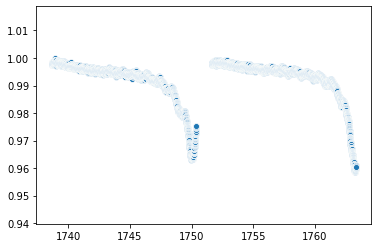

In [97]:
sns.scatterplot(x=time, y=pdcsap_flux_o_err)

In [104]:
y_test = pdcsap_flux_o_err[::20]

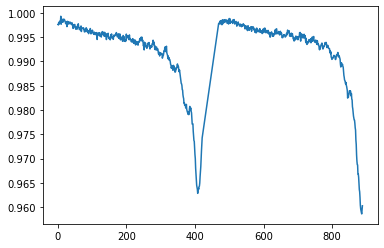

In [105]:
sns.lineplot(x=np.arange(len(y_test)), y=y_test)

In [106]:
from scipy.ndimage.filters import maximum_filter1d

In [118]:
w = 100
y_test = maximum_filter1d(sap_flux_o_err, w)
y_test = y_test[::w]
t = time[::w]

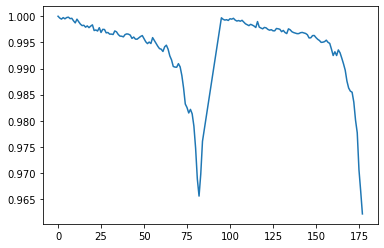

In [120]:
sns.lineplot(x=np.arange(len(y_test)), y=y_test)

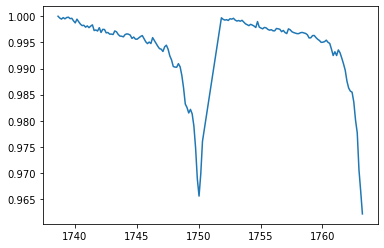

In [119]:
sns.lineplot(x=t, y=y_test)